---
### Import Libraries

In [ ]:
!pip install pycaret

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

from sklearn.metrics import *
import scikitplot as skplt

df = pd.read_csv("normalized_combined_dataset.csv")

### Exploratory Data Analysis

In [7]:
df.head()

,MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA
0,0.0303,0.244,0.0774,0.523,1.0,0.654,0.617
1,0.0233,0.227,0.0377,0.607,1.0,0.600,0.530
2,0.0257,0.432,0.0559,0.478,1.0,0.683,0.460
3,0.0686,0.224,0.0900,0.552,1.0,0.688,0.908
4,0.0766,0.231,0.0577,0.542,1.0,0.584,0.913


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:RAP      350 non-null    float64
 1   MDVP:Shimmer  350 non-null    float64
 2   NHR           350 non-null    float64
 3   HNR           350 non-null    float64
 4   status        350 non-null    float64
 5   RPDE          350 non-null    float64
 6   DFA           350 non-null    float64
dtypes: float64(7)
memory usage: 19.3 KB


In [9]:
df.describe()

,MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.088292,0.190671,0.071504,0.582082,0.751429,0.525939,0.548183
std,0.122787,0.168513,0.135024,0.172316,0.432804,0.201116,0.236139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011700,0.064225,0.011675,0.487250,1.000000,0.372000,0.357500
50%,0.053000,0.142500,0.027650,0.593000,1.000000,0.530500,0.549000
75%,0.115500,0.262500,0.059400,0.713250,1.000000,0.681750,0.744750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


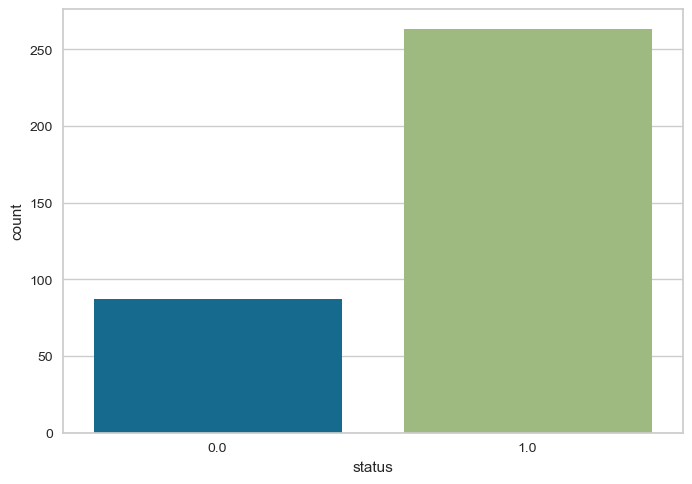

In [10]:
ax = sns.countplot(x="status", data=df)

### Split training & test dataset

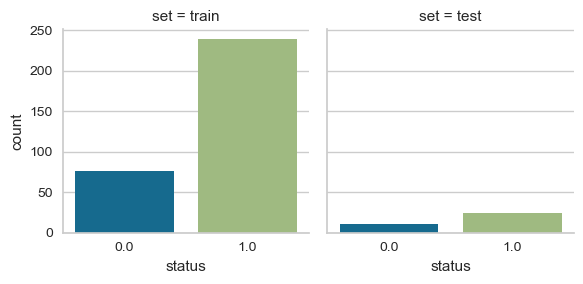

Training dataset           : 315
Unseen data for validation : 35


In [11]:
test_df = df.sample(frac=0.1)
train_df = df.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

### Setup environment

In [12]:
clf1 = setup(data = train_df, target = 'status',ignore_features = ['name'], fix_imbalance=True, session_id=123, remove_outliers = True)




,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(315, 8)"
4,Transformed data shape,"(411, 8)"
5,Transformed train set shape,"(316, 8)"
6,Transformed test set shape,"(95, 8)"
7,Ignore features,1
8,Numeric features,6
9,Categorical features,1


### Model selection

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7915,0.7784,0.8658,0.8660,0.8624,0.4129,0.4247,0.6220
lightgbm,Light Gradient Boosting Machine,0.7832,0.8049,0.8450,0.8734,0.8563,0.4013,0.4131,0.5660
rf,Random Forest Classifier,0.7587,0.7871,0.8289,0.8563,0.8396,0.3394,0.3470,0.5730
gbc,Gradient Boosting Classifier,0.7583,0.7920,0.8345,0.8517,0.8404,0.3311,0.3393,0.4910
dt,Decision Tree Classifier,0.7335,0.6393,0.8120,0.8341,0.8204,0.2795,0.2838,0.3290
ada,Ada Boost Classifier,0.7015,0.6915,0.7599,0.8353,0.7935,0.2508,0.2582,0.4670
knn,K Neighbors Classifier,0.6855,0.6998,0.7178,0.8568,0.7756,0.2484,0.2686,0.3040
lda,Linear Discriminant Analysis,0.6853,0.7780,0.6912,0.8740,0.7696,0.2899,0.3124,0.3620
ridge,Ridge Classifier,0.6682,0.0000,0.6702,0.8721,0.7521,0.2698,0.2947,0.3220
lr,Logistic Regression,0.6647,0.7403,0.6599,0.8769,0.7465,0.2723,0.2986,0.9380


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Create Extra Trees Classifier Model

In [ ]:
extraTreesClassifier = create_model('et')

### Tuned Model

In [ ]:
tuned_extraTreesClassifier = tune_model(extraTreesClassifier)

### Evaluate training performance

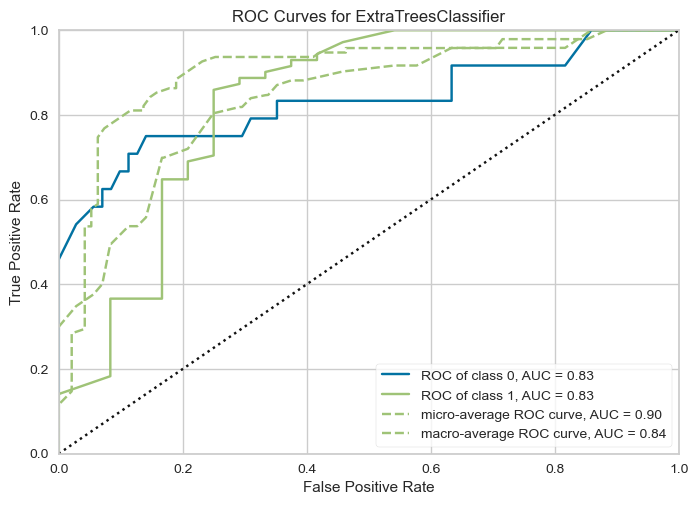

In [25]:
plot_model(tuned_extraTreesClassifier, plot = 'auc')

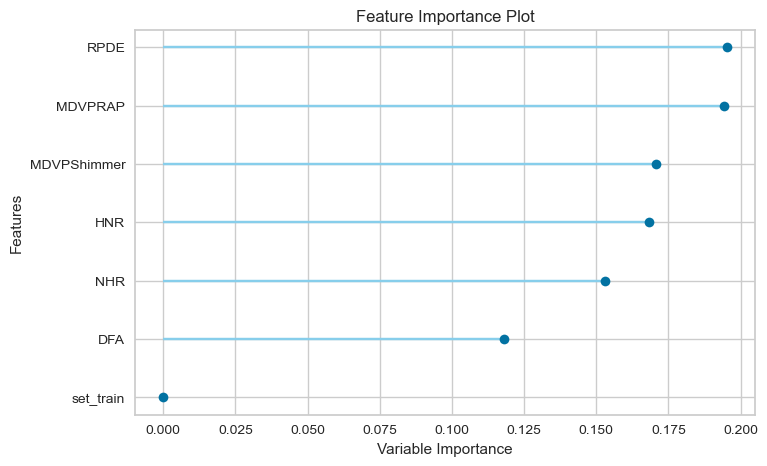

In [7]:
plot_model(tuned_extraTreesClassifier, plot='feature')

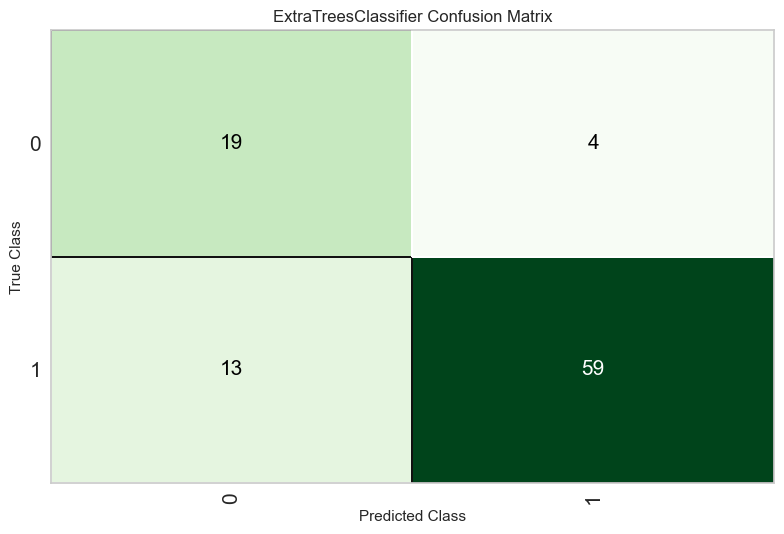

In [8]:
plot_model(tuned_extraTreesClassifier, plot = 'confusion_matrix')

### Evaluate on unseen data

In [9]:
final_extraTreesClassifier = finalize_model(tuned_extraTreesClassifier)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7429,0.8659,0.7391,0.8500,0.7907,0.4615,0.4692


              precision    recall  f1-score   support

   parkinson       0.60      0.75      0.67        12
      normal       0.85      0.74      0.79        23

    accuracy                           0.74        35
   macro avg       0.72      0.74      0.73        35
weighted avg       0.76      0.74      0.75        35



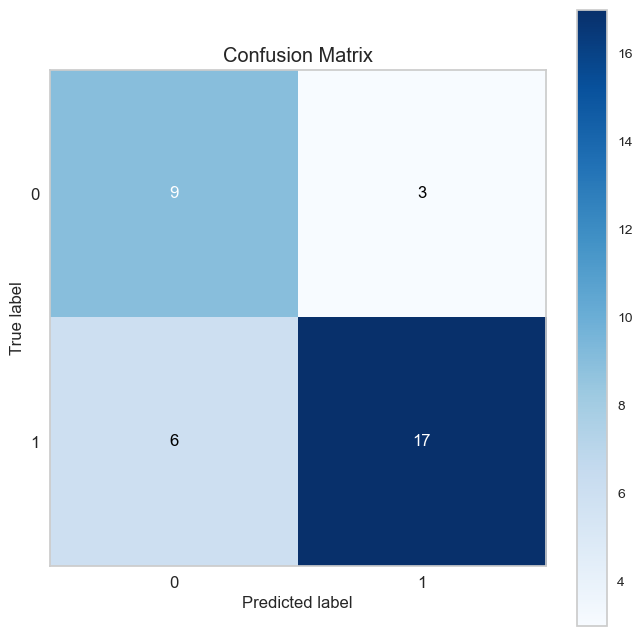

In [10]:
unseen_predictions = predict_model(final_extraTreesClassifier, data=test_df)
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)


